<a href="https://colab.research.google.com/github/c-marq/CAP3321C-Data-Wrangling/blob/main/demos/ch02-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2: The Pandas essentials for data analysis

In [216]:
import pandas as pd

## Get the data

### Read a CSV file from a website into a DataFrame

In [217]:
url = 'https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD'
mortality_data = pd.read_csv(url)

In [218]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


### Use DataFrame constructor to build a DataFrame object

In [219]:
df_data=[[1900, '1-4 Years', 1983.8],
         [1901, '1-4 Years', 1695.0],
         [1902, '1-4 Years', 1655.7]]
df_columns=['Year', 'Age Group', 'Death Rate']

In [220]:
mortality_df = pd.DataFrame(
    data=df_data,
    columns=df_columns)

In [221]:
mortality_df

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7


### Save and restore a DataFrame

In [222]:
mortality_data.to_pickle('mortality_data.pkl')

In [223]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [224]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Examine and clean the data

### Display the data

In [225]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [226]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [227]:
mortality_data.tail(3)

,Year,Age Group,Death Rate
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


In [228]:
with pd.option_context(
    'display.max_rows', 6,
    'display.max_columns', None):
    display(mortality_data)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
...,...,...,...
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


### Display the DataFrame attributes

In [229]:
mortality_data.values

array([[1900, '1-4 Years', 1983.8],
       [1901, '1-4 Years', 1695.0],
       [1902, '1-4 Years', 1655.7],
       ...,
       [2016, '15-19 Years', 51.2],
       [2017, '15-19 Years', 51.5],
       [2018, '15-19 Years', 49.2]], dtype=object)

In [230]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to replace spaces with nothing

In [231]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')

In [232]:
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [233]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


### Use the info(), nunique(), and describe() methods

In [234]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [235]:
mortality_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 35.0 KB


In [236]:
mortality_data.nunique()

,0
Year,119
AgeGroup,4
DeathRate,430


In [237]:
mortality_data.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [238]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


## Access the data

### Access columns

In [239]:
mortality_data.DeathRate.head(2)

,DeathRate
0,1983.8
1,1695.0


In [240]:
mortality_data['DeathRate'].head(2)

,DeathRate
0,1983.8
1,1695.0


In [241]:
mortality_data[['Year','DeathRate']].head(2)

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0


### Access rows

In [242]:
mortality_data.query('Year==1900')

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
357,1900,15-19 Years,484.8


In [243]:
mortality_data.query('Year == 2000 and AgeGroup != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


In [244]:
mortality_data.query('Year == 1900 or Year == 2000').head(8)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3
338,2000,10-14 Years,20.3
357,1900,15-19 Years,484.8
457,2000,15-19 Years,67.1


In [245]:
# use backticks if a column name contains spaces
# mortality_data.query('Year == 2000 and `Age Group` != "1-4 Years"')

### Access a subset of rows and columns

In [246]:
mortality_data.query('Year == 1900').DeathRate.head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [247]:
mortality_data.query('Year == 1900')['DeathRate'].head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [248]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### Access rows with the loc[] accessor

In [249]:
mortality_data.loc[[0,4,9]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
4,1904,1-4 Years,1591.5
9,1909,1-4 Years,1348.9


In [250]:
mortality_data.loc[4:6]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0


In [251]:
mortality_data.loc[0:20:5]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3
15,1915,1-4 Years,924.2
20,1920,1-4 Years,987.2


In [252]:
mortality_data.loc[mortality_data.Year == 1917]

,Year,AgeGroup,DeathRate
17,1917,1-4 Years,1066.0
136,1917,5-9 Years,290.7
255,1917,10-14 Years,218.9
374,1917,15-19 Years,380.3


### Access columns with the loc[] accessor

In [253]:
mortality_data.loc[:, ['Year', 'AgeGroup']]

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years
2,1902,1-4 Years
3,1903,1-4 Years
4,1904,1-4 Years
...,...,...
471,2014,15-19 Years
472,2015,15-19 Years
473,2016,15-19 Years
474,2017,15-19 Years


### Access rows and columns with the loc[] accessor

In [254]:
mortality_data.loc[[0,5,10],['AgeGroup','DeathRate']]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [255]:
mortality_data.loc[4:6,'AgeGroup':'DeathRate']

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


### How to access rows and columns with the iloc[] accessor

In [256]:
mortality_data.iloc[[4,5,6],[1,2]]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [257]:
mortality_data.iloc[4:7,1:3]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [258]:
mortality_data.iloc[-10:]

,Year,AgeGroup,DeathRate
466,2009,15-19 Years,51.9
467,2010,15-19 Years,49.4
468,2011,15-19 Years,48.9
469,2012,15-19 Years,47.2
470,2013,15-19 Years,44.8
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


## Prepare the data

### Sort the data

In [259]:
mortality_data.sort_values('DeathRate', ascending=False).head(3)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7


In [260]:
mortality_data.sort_values(['Year','DeathRate']).head(3)

,Year,AgeGroup,DeathRate
238,1900,10-14 Years,298.3
119,1900,5-9 Years,466.1
357,1900,15-19 Years,484.8


In [261]:
mortality_data.sort_values(['Year','DeathRate'],
                           ascending=[True,False]).head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
357,1900,15-19 Years,484.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
1,1901,1-4 Years,1695.0


### Apply statistical methods

In [262]:
mortality_data.DeathRate.mean()

np.float64(192.92415966386554)

In [263]:
mortality_data[['AgeGroup','DeathRate']].max()

,0
AgeGroup,5-9 Years
DeathRate,1983.8


In [264]:
mortality_data.count()

,0
Year,476
AgeGroup,476
DeathRate,476


In [265]:
mortality_data[['Year', 'DeathRate']].quantile([.1,.9])

,Year,DeathRate
0.1,1911.5,21.50
0.9,2006.5,430.85


In [266]:
mortality_data.DeathRate.cumsum()

,DeathRate
0,1983.8
1,3678.8
2,5334.5
3,6876.6
4,8468.1
...,...
471,91631.7
472,91680.0
473,91731.2
474,91782.7


### Use Python for column arithmetic

In [267]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [268]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
1,1901,1-4 Years,1695.0,1502.07584
2,1902,1-4 Years,1655.7,1462.77584
3,1903,1-4 Years,1542.1,1349.17584


In [269]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [270]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1790.87584
1,1901,1-4 Years,0.016950,1502.07584
2,1902,1-4 Years,0.016557,1462.77584
3,1903,1-4 Years,0.015421,1349.17584


### Modify the string data in a column

In [271]:
mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'],
    inplace = True)

/tmp/ipython-input-4011209290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mortality_data.AgeGroup.replace(


In [272]:
mortality_data.AgeGroup.replace(
    {'1-4 Years':'01-04 Years','5-9 Years':'05-09 Years'},
    inplace = True)

In [273]:
# mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('1-4 Years','01-04 Years')
# mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('5-9 Years','05-09 Years')

In [274]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584


## Shape the data

### Set and use an index

In [292]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,MeanCentered
Year,,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584


In [308]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,index,DeathRate,MeanCentered
0,1900,01-04 Years,0,0.019838,1790.87584
1,1901,01-04 Years,1,0.016950,1502.07584


In [277]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
# mortality_data = mortality_data.set_index('Year', verify_integrity=True)

In [309]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,index,DeathRate,MeanCentered
Year,AgeGroup,,,
1900,01-04 Years,0,0.019838,1790.87584
1901,01-04 Years,1,0.016950,1502.07584


In [310]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,index,DeathRate,MeanCentered
0,1900,01-04 Years,0,0.019838,1790.87584
1,1901,01-04 Years,1,0.016950,1502.07584


### Pivot the data

In [313]:
from numpy._core.defchararray import index
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215


In [314]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

index                                       DeathRate  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years 01-04 Years   
Year                                                                   
1900               0         119         238         357    0.019838   
1901               1         120         239         358    0.016950   
1902               2         121         240         359    0.016557   

                                             MeanCentered              \
AgeGroup 05-09 Years 10-14 Years 15-19 Years  01-04 Years 05-09 Years   
Year                                                                    
1900        0.004661    0.002983    0.004848   1790.87584   273.17584   
1901        0.004276    0.002736    0.004544   1502.07584   234.67584   
1902        0.004033    0.002525    0.004215   1462.77584   210.37584   

                                  
AgeGroup 10-14 Years 15-19 Years  
Year                              
1900       105.37584   291.87584  
1901        80.67584   261.47584  
1902        59.57584   228.57584

### Melt the data

In [316]:
# get starting data
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')

# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341


In [320]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['01-04 Years','05-09 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,0.019838
1,1901,01-04 Years,0.016950
...,...,...,...
236,2017,05-09 Years,0.000116
237,2018,05-09 Years,0.000115


## Analyze the data

### Group the data

In [321]:
mortality_data.groupby('AgeGroup').mean()

,Year,index,DeathRate,MeanCentered
AgeGroup,,,,
01-04 Years,1959.0,59.0,0.003832,190.301891
05-09 Years,1959.0,178.0,0.001173,-75.598109
10-14 Years,1959.0,297.0,0.000938,-99.154412
15-19 Years,1959.0,416.0,0.001774,-15.549370


In [327]:
mortality_data.groupby('Year').median(numeric_only=True).head(4)

,index,DeathRate,MeanCentered
Year,,,
1900,178.5,0.004755,282.52584
1901,179.5,0.004410,248.07584
1902,180.5,0.004124,219.47584
1903,181.5,0.004244,231.47584


In [328]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

index  DeathRate  MeanCentered
Year AgeGroup                                   
1900 01-04 Years      1          1             1
     05-09 Years      1          1             1
     10-14 Years      1          1             1
     15-19 Years      1          1             1
1901 01-04 Years      1          1             1

### Aggregate the data

In [333]:
mortality_data.groupby('AgeGroup').agg(['mean','median'])

Year          index        DeathRate           MeanCentered  \
               mean  median   mean median      mean    median         mean   
AgeGroup                                                                     
01-04 Years  1959.0  1959.0   59.0   59.0  0.003832  0.001091   190.301891   
05-09 Years  1959.0  1959.0  178.0  178.0  0.001173  0.000484   -75.598109   
10-14 Years  1959.0  1959.0  297.0  297.0  0.000938  0.000446   -99.154412   
15-19 Years  1959.0  1959.0  416.0  416.0  0.001774  0.001069   -15.549370   

                        
                median  
AgeGroup                
01-04 Years  -83.82416  
05-09 Years -144.52416  
10-14 Years -148.32416  
15-19 Years  -86.02416

In [334]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
01-04 Years,0.003832,0.001091,0.005005,117
05-09 Years,0.001173,0.000484,0.001275,115
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117


In [335]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,0.000062,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,0.000044,4
1902,0.006833,0.004124,0.006527,0.002525,0.016557,0.000043,4


## Visualize the data

<Axes: xlabel='Year'>

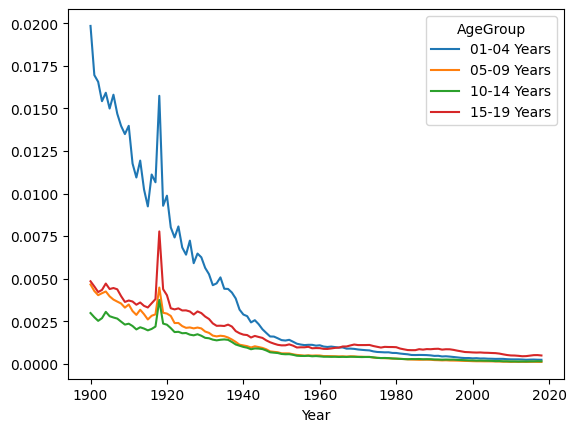

In [343]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

<Axes: xlabel='AgeGroup'>

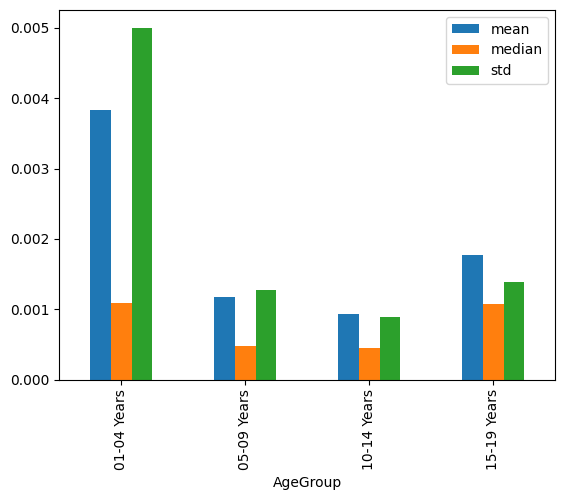

In [346]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.bar()